<a href="https://colab.research.google.com/github/byiringiroscar/NLP_FELLOWSHIP/blob/main/pytorch_documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

#create 1d torch

In [2]:
x = torch.empty(1) 

#create 2d torch

In [3]:
x = torch.empty(2, 3)
x

tensor([[5.4572e-35, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

#create 3d torch 

In [4]:
x = torch.empty(3, 3, 3)
x

tensor([[[5.4148e-35, 0.0000e+00, 1.3452e-43],
         [0.0000e+00,        nan, 0.0000e+00],
         [2.8937e+12, 7.5338e+28, 7.2053e+22]],

        [[4.7428e+30, 6.9983e+28, 1.2412e+28],
         [1.0304e+21, 2.7495e+26, 5.6502e-02],
         [1.8728e+31, 7.3867e+20, 2.0027e-19]],

        [[7.8026e+34, 1.0894e+27, 1.4603e-19],
         [1.6795e+08, 4.7423e+30, 4.7393e+30],
         [9.5461e-01, 4.4377e+27, 1.7975e+19]]])

#create empty zeros and ones

In [5]:
x = torch.zeros(2, 2) # 2d dimension
x

tensor([[0., 0.],
        [0., 0.]])

In [6]:
x = torch.zeros(2, 2, dtype=torch.int) # change dataype
x

tensor([[0, 0],
        [0, 0]], dtype=torch.int32)

#create your tensor 

In [7]:
x = torch.tensor([2.5, 0.1, 2.3]) # create 1d tensor
x

tensor([2.5000, 0.1000, 2.3000])

# let's see randon with torch , add, sub, div , mul

In [8]:
x = torch.rand(2,2)
y = torch.rand(2,2)
x

tensor([[0.6884, 0.2727],
        [0.2476, 0.2863]])

In [9]:
z = x + y
z = torch.add(x, y)

inplace addition


In [10]:
y.add_(x) # inplace will modifie y variable add with x
y

tensor([[1.0947, 0.7245],
        [1.2403, 1.1331]])

In [11]:
z = torch.sub(x, y)
z = x-y
z = torch.mul(x, y)
z = x*y
z = torch.div(x, y)
z=x/y

#create random with 2d dimension then do slicing

In [12]:
# remember rows go vertical | and column go horizontal __  and(rows, column)
x = torch.rand(5, 3)
print(x)
print(x[:, 1]) # this will print all rows in column 1
print(x[:, 1:])
print(x[1,:]) # this will print rows 1 and all column  
print(x[:, [0]])

tensor([[0.5819, 0.6698, 0.6924],
        [0.5007, 0.5693, 0.9291],
        [0.6613, 0.6597, 0.9532],
        [0.8137, 0.0032, 0.7291],
        [0.7939, 0.3470, 0.1255]])
tensor([0.6698, 0.5693, 0.6597, 0.0032, 0.3470])
tensor([[0.6698, 0.6924],
        [0.5693, 0.9291],
        [0.6597, 0.9532],
        [0.0032, 0.7291],
        [0.3470, 0.1255]])
tensor([0.5007, 0.5693, 0.9291])
tensor([[0.5819],
        [0.5007],
        [0.6613],
        [0.8137],
        [0.7939]])


In [13]:
print(x[1,1])
print(x[1,1].item()) # print actual element 

tensor(0.5693)
0.5693174004554749


#reshape tensor

In [14]:
x = torch.rand(4,4)
y = x.view(16) #  4*4 = 16
print(y) # will be in 1d

tensor([0.7551, 0.8022, 0.3166, 0.1822, 0.8549, 0.0255, 0.7982, 0.7242, 0.1828,
        0.9076, 0.6955, 0.1584, 0.0602, 0.7447, 0.4166, 0.5360])


In [15]:
y = x.view(-1, 8) # this will take 2d with 8,8

#convert tensor to numpy

In [16]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [17]:
b = a.numpy()
print(type(b)) # convert a tensor to numpy array

<class 'numpy.ndarray'>


N:B when we tensor are running on cpu not on gpu will share same memory then effect from one it will effect others
because they are sharing same memory location

In [18]:

a
a.add_(1)

tensor([2., 2., 2., 2., 2.])

In [19]:
b

array([2., 2., 2., 2., 2.], dtype=float32)

In [20]:
a = np.ones(5)
a

array([1., 1., 1., 1., 1.])

In [21]:
b = torch.from_numpy(a) # by default it will have datatype torch.float64

In [22]:
a += 1

In [23]:
a

array([2., 2., 2., 2., 2.])

In [24]:
b

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

#if we are running on cuda toolkit

In [25]:
# we can check it by this
if torch.cuda.is_available():
  device = torch.device("cuda") # when you are on window and you have cuda available
  #create tensor on gpu
  x = torch.ones(5, device=device) # this will create tensor then put on gpu
  # or we can do like this
  y = torch.ones(5)
  y = y.to(device=device) # and it will be much fast
  z = x +y
  #z.numpy() # this will return error because numpy handle cpu tensor we have to move it back to cpu
  z = z.to("cpu")
else:
  print("no")

In [26]:
x = torch.ones(5, requires_grad=True) # this will pytorch that we will be using gradient in optimization later
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

#autograd package
this will help us in our model optimization

In [27]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x +2 # here our input is x and 2  
print(y)

tensor([-0.0581, -0.3248, -0.8899], requires_grad=True)
tensor([1.9419, 1.6752, 1.1101], grad_fn=<AddBackward0>)


grad can be implicitly created only for scalar outputs solve this error by creating torch with same dimension then pass it in backward

In [28]:
z = y*y*2
#z = z.mean()
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z

tensor([7.5419, 5.6124, 2.4645], grad_fn=<MulBackward0>)

calculate gradient

In [29]:
#z.backward() # calculate gradient # dz/dx
#print(x.grad)
z.backward(v)
print(x.grad)

tensor([7.7676e-01, 6.7007e+00, 4.4403e-03])


# prevent pytorch to track our history so we have 3 option to solve it


1.   x.requires_grad_(False)
2.   x.detach()
3.   with torch.no_grad():






In [30]:
x = torch.randn(3, requires_grad=True)
x

tensor([-1.1313,  0.3660,  0.4355], requires_grad=True)

option 1

In [31]:
x.requires_grad_(False)
x

tensor([-1.1313,  0.3660,  0.4355])

option 2

In [32]:
y = x.detach()
y

tensor([-1.1313,  0.3660,  0.4355])

option 3

In [33]:
with torch.no_grad():
  y = x+2
  print(y)

tensor([0.8687, 2.3660, 2.4355])


In [34]:
weights = torch.ones(4, requires_grad=True)
print(weights)


for epoch in range(3):
  print("weights *****************", weights)
  model_output = (weights*3).sum()
  print("model_output *****************", model_output)
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_() # before we do the next iteration and optimization we must empty the gradient

  print("========================================end=====================")

tensor([1., 1., 1., 1.], requires_grad=True)
weights ***************** tensor([1., 1., 1., 1.], requires_grad=True)
model_output ***************** tensor(12., grad_fn=<SumBackward0>)
tensor([3., 3., 3., 3.])
========================================end=====================
weights ***************** tensor([1., 1., 1., 1.], requires_grad=True)
model_output ***************** tensor(12., grad_fn=<SumBackward0>)
tensor([3., 3., 3., 3.])
========================================end=====================
weights ***************** tensor([1., 1., 1., 1.], requires_grad=True)
model_output ***************** tensor(12., grad_fn=<SumBackward0>)
tensor([3., 3., 3., 3.])
========================================end=====================


#let's see example by using built in optimizer

In [35]:
#weights = torch.ones(4, requires_grad=True)
#optimizer = torch.optim.SGD(weights, lr=0.01)
#optimizer.step()
#optimizer.zero_grad() # here we do it before we got to the next iteration

#backpropagation

In [36]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat = w *x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# gradient descent using Autograd






  ##step 1
1.   prediction:Manually
2.   Gradients Computation: Manually
2.   loss Computation: Manually
2.   Parameter updates: Manually

#built our gradients with numpy and we are doing this implementation manually

In [37]:
# # f = w * x
# # f = 2 * x

# X = np.array([1,2,3,4], dtype=np.float32)
# Y = np.array([2,4,6,8], dtype=np.float32) # since our formular above comment 2 * x 
# w = 0.0
# # model prediction
# def forward(x):
#   return w*x


# # loss  = MSE(MEAN SQUARED ERROR) this happen in case of linear regression
# def loss(y, y_predicted):
#   return ((y_predicted -y)**2).mean()


# #gradient 
# #MSE = 1/N *(w*x -y)**2
# #dJ/dw = 1/n 2*x (w*x -y)

# def gradient(x, y, y_predicted):
#   return np.dot(2*x, y_predicted-y).mean()

# print(f'Prediction before training: f(5) = {forward(5):.3f}')

# #training
# learning_rate = 0.01
# n_iters = 20

# for epoch in range(n_iters):
#   #prediction = forwad pass
#   y_pred = forward(X)
#   #loss
#   l = loss(Y, y_pred)
#   #gradients

#   dw = gradient(X, Y, y_pred)
#   #update weights
#   w -= learning_rate * dw
#   if epoch % 2 == 0:
#     print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')
# print(f'Prediction after training: f(5) = {forward(5):.3f}')


#built this gradients with torch 

In [38]:
# # f = w * x
# # f = 2 * x

# X = torch.tensor([1,2,3,4], dtype=torch.float32)
# Y = torch.tensor([2,4,6,8], dtype=torch.float32) # since our formular above comment 2 * x 
# w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
# # model prediction
# def forward(x):
#   return w*x


# # loss  = MSE(MEAN SQUARED ERROR) this happen in case of linear regression
# def loss(y, y_predicted):
#   return ((y_predicted -y)**2).mean()



# print(f'Prediction before training: f(5) = {forward(5):.3f}')

# #training
# learning_rate = 0.01
# n_iters = 100

# for epoch in range(n_iters):
#   #prediction = forwad pass
#   y_pred = forward(X)
#   #loss
#   l = loss(Y, y_pred)

#   #gradients = backward pass

#   l.backward()
#   #update weights
#   with torch.no_grad():
#     w -= learning_rate * w.grad
#   # zero gradients this is for help us to put this w 0 after our epoch
#   w.grad.zero_()
#   if epoch % 10 == 0:
#     print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')
# print(f'Prediction after training: f(5) = {forward(5):.3f}')


#Training pipeline
model/loss/optimizer
 ##step2
1.   prediction:Manually
2.   Gradients Computation: Autograd
2.   loss Computation: Manually
2.   Parameter updates: Manually

In [39]:
# 1) Design model(input, output size, forwad pass)
# 2) construct loass and optimizer
# 3) training loop
#   -forward pass: compute predicition
#   -backward pass: gradients
#   -update weights

In [40]:
# import torch
# import torch.nn as nn
# # f = w * x
# # f = 2 * x

# X = torch.tensor([1,2,3,4], dtype=torch.float32)
# Y = torch.tensor([2,4,6,8], dtype=torch.float32) # since our formular above comment 2 * x 
# w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
# # model prediction
# def forward(x):
#   return w*x
# print(f'Prediction before training: f(5) = {forward(5):.3f}')

# #training
# learning_rate = 0.01
# n_iters = 100
# loss = nn.MSELoss() # mean squared error(MSE) so we don't have again to call function manually here we are using provided from torch
# optimizer = torch.optim.SGD([w], lr=learning_rate) # here again we are optimizer our model again by using SGD

# for epoch in range(n_iters):
#   #prediction = forwad pass
#   y_pred = forward(X)
#   #loss
#   l = loss(Y, y_pred)

#   #gradients = backward pass

#   l.backward()
#   #update weights
#   optimizer.step() # here we are in process of optimization
#   # zero gradients this is for help us to put this w 0 after our epoch
#   optimizer.zero_grad() # here we are emptying the gradient after optimization step
#   if epoch % 10 == 0:
#     print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')
# print(f'Prediction after training: f(5) = {forward(5):.3f}')


# here we are going to pursuide in step 3
so above we compute forward pass manually so we are going to change it


*   so here we don't need forward pass manually
*   here we don't need initialization of weights so our pytorch model know our parameter
*   our x, y must have different shapes this must be 2d array 



In [41]:
# 1) Design model(input, output size, forwad pass)
# 2) construct loass and optimizer
# 3) training loop
#   -forward pass: compute predicition
#   -backward pass: gradients
#   -update weights

In [42]:
import torch
import torch.nn as nn
# f = w * x
# f = 2 * x

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32) # since our formular above comment 2 * x 

X_test = torch.tensor([6], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)
input_size = n_features
output_size = n_features

# so you can use this line for initialize our model but also down side we can do it by overlide the class for it then do the same job
#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.lin = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    return self.lin(x)
model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

#training
learning_rate = 0.01
n_iters = 10000
loss = nn.MSELoss() # mean squared error(MSE) so we don't have again to call function manually here we are using provided from torch
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # here again we are optimizer our model again by using SGD
# model.parameters() is replacing weights(w) as will be optimized

for epoch in range(n_iters):
  #prediction = forwad pass
  y_pred = model(X)
  #loss
  l = loss(Y, y_pred)

  #gradients = backward pass

  l.backward()
  #update weights
  optimizer.step() # here we are in process of optimization
  # zero gradients this is for help us to put this w 0 after our epoch
  optimizer.zero_grad() # here we are emptying the gradient after optimization step
  if epoch % 1000 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss={l:.8f}')
print(f'Prediction after training: f(6) = {model(X_test).item():.3f}')


4 1
Prediction before training: f(5) = -1.623
epoch 1: w = -0.022, loss=36.00893021
epoch 1001: w = 1.981, loss=0.00054854
epoch 2001: w = 1.999, loss=0.00000136
epoch 3001: w = 2.000, loss=0.00000000
epoch 4001: w = 2.000, loss=0.00000000
epoch 5001: w = 2.000, loss=0.00000000
epoch 6001: w = 2.000, loss=0.00000000
epoch 7001: w = 2.000, loss=0.00000000
epoch 8001: w = 2.000, loss=0.00000000
epoch 9001: w = 2.000, loss=0.00000000
Prediction after training: f(6) = 12.000


#Linear Regression

In [43]:
# 1) Design model(input, output size, forwad pass)
# 2) construct loass and optimizer
# 3) training loop
#   -forward pass: compute predicition
#   -backward pass: gradients
#   -update weights

In [44]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss=4315.8545
epoch: 20, loss=3223.2861
epoch: 30, loss=2432.1636
epoch: 40, loss=1858.7372
epoch: 50, loss=1442.7134
epoch: 60, loss=1140.6249
epoch: 70, loss=921.0934
epoch: 80, loss=761.4405
epoch: 90, loss=645.2552
epoch: 100, loss=560.6510


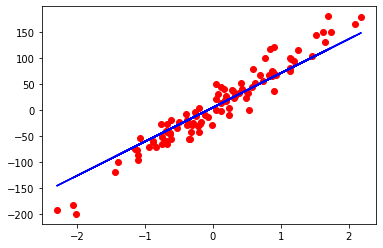

In [45]:
#0)prepare our data
# generate regression dataset
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
# convert to torch tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# let's reshape our y , this have one row we want to make it column vector
# this view is built in help to reshape our tensor
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

#1)model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)



#2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)
  #backward pass
  loss.backward()
  #update
  optimizer.step()
  # empty our gradient to zero
  optimizer.zero_grad()

  if(epoch+1) % 10 ==0:
    print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

#Logistic Regression

In [46]:
# 1) Design model(input, output size, forwad pass)
# 2) construct loass and optimizer
# 3) training loop
#   -forward pass: compute predicition
#   -backward pass: gradients
#   -update weights

In [47]:
import torch
import torch.nn as nn
import numpy as np# to make data transformation
from sklearn import datasets # to load binary classification dataset
from sklearn.preprocessing import StandardScaler # we want to scale our features
from sklearn.model_selection import train_test_split # we want to have speration of training and test data


In [48]:
#0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#scale our features
sc = StandardScaler() # this standard or required to do when we are dealing with logistic regression and it will help our features to have 0 mean and unot variance

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape our y
y_train = y_train.view(y_train.shape[0], 1) # we want to make it column vector we want to put wach value in row with only one column
y_test = y_test.view(y_test.shape[0], 1)





#1) set up model
#f = wx + b  , sigmoid at the end

class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    #output size 1
    self.linear = nn.Linear(n_input_features, 1)# so we use built in layer we define our layer we only have one layer

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)


#2) loss and optimizer
learning_rate - 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)




#3) training loop**** in taining loop we do{forward pass and loss, backwardpass, updates}

num_epoch = 100
for epoch in range(num_epoch):
  #forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward pass
  loss.backward()

  #updates
  optimizer.step()
  #zero our gradients
  optimizer.zero_grad()
  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round() # as sigmod output 0~1 so we round the result
  acc = y_predicted_cls.eq(y_test).sum() /float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')


epoch: 10, loss = 0.7291
epoch: 20, loss = 0.5815
epoch: 30, loss = 0.4916
epoch: 40, loss = 0.4315
epoch: 50, loss = 0.3882
epoch: 60, loss = 0.3553
epoch: 70, loss = 0.3293
epoch: 80, loss = 0.3082
epoch: 90, loss = 0.2905
epoch: 100, loss = 0.2755
accuracy = 0.8860


#dataset and dataloader

In [49]:
'''
epoch = 1 forward and backward pass of all training samples
batch_size = number of training samples in one forward & backward pass
number of iterations = number of passes, each pass using [batch_size] number of samples
e.g. 100 samples, batch_size=20 --> 100/20 = 5 iterations for 1 epoch

'''

'\nepoch = 1 forward and backward pass of all training samples\nbatch_size = number of training samples in one forward & backward pass\nnumber of iterations = number of passes, each pass using [batch_size] number of samples\ne.g. 100 samples, batch_size=20 --> 100/20 = 5 iterations for 1 epoch\n\n'

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


class WineDataset(Dataset):
  def __init__(self):
    #data loading
    xy = np.loadtxt('https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/master/data/wine/wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) #n_samples, 1
    self.n_samples = xy.shape[0]
  def __getitem__(self, index):
    # dataset[0]
    return self.x[index], self.y[index]

  def __len__(self):
    # len(dataset)
    return self.n_samples
dataset = WineDataset()
#check if we get the data from dataset for the first data
#first_data = dataset[0]
#feautures, labels = first_data
#print(feautures, labels)
#dataloader

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

# datatiter = iter(dataloader)
# data = next(datatiter)
# features, labels = data
# print(features, labels)

# let's do dummy training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
#print(total_samples, n_iterations)
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    #forward backward, update
    if (i+1) % 5 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')
# even pytorch have built in dataset
torchvision.datasets.MNIST
# fashion-mnist, cifar, coco


#dataset transforms
torchvision.transforms

In [5]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


class WineDataset(Dataset):
  def __init__(self, transform=None):
    #data loading
    xy = np.loadtxt('https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/master/data/wine/wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.n_samples = xy.shape[0]
    # note that we don't convert to tensor here
    self.x = xy[:, 1:]
    self.y = xy[:, [0]] #n_samples, 1
    

    self.transform = transform
  def __getitem__(self, index):
    # dataset[0]
    sample =  self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample

  def __len__(self):
    # len(dataset)
    return self.n_samples

#sample transform
class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)
class MulTransform:
  def __init__(self, factor):
    self.factor = factor
  def __call__(self, sample):
    inputs, target = sample
    inputs *= self.factor
    return inputs, target
dataset = WineDataset(transform=None)
first_data = dataset[0]
feautures, labels = first_data
print(feautures)
print(type(feautures), type(labels))
print("===============================")

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)]) # this 2 will be multiplied to features 
dataset = WineDataset(transform=composed)
first_data = dataset[0]
feautures, labels = first_data
print(feautures)
print(type(feautures), type(labels))

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
